<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1: KNN

## Задача классификации

### 1.	Выбор начальных условий




a. Выбор набора данных


Набор данных: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
(определение качества яблок)

Практическая значимость: Качество сельскохозяйственной продукции напрямую влияет на экономику и здоровье потребителей. Определение качества яблок по их характеристикам (размер, сладость, хрусткость и т.д.) - актуальная задача в агропромышленном секторе.

b. Выбор метрик качества для определения качества яблок

- Accuracy -  дает общее представление о том, насколько хорошо модель справляется с задачей классификации в целом.

- Precision - если модель ошибочно классифицирует плохое яблоко как хорошее (false positive), это может привести к серьезным последствиям - бракованная продукция попадет к потребителю.

- Recall - если модель пропускает много хороших яблок (false negative), это приводит к неоправданным потерям для производителя, так как качественная продукция может быть отбракована.

- F1-score - помогает найти баланс между Precision и Recall.

- Confusion Matrix - позволит наглядно увидеть, какие именно ошибки совершает модель.

### 2. Создание бейзлайна и оценка качества

In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [170]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


In [171]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [172]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [173]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [174]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [175]:
#Бейзлайн модель и предсказания
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)

y_pred_baseline = knn_baseline.predict(X_test)


KNN Baseline Результаты:
Accuracy: 0.8942
Precision: 0.8943
Recall: 0.8942
F1-score: 0.8942


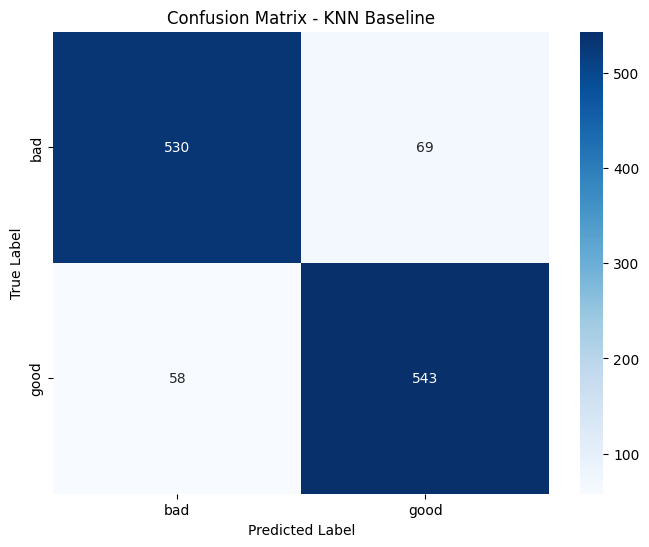

In [176]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name} Результаты:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

baseline_results = evaluate_model(y_test, y_pred_baseline, "KNN Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: подбор оптимального k (количетсва соседей)

Гипотеза 2: масштабирование данных

Гипотеза 3: подбор метрики расстояния и весов

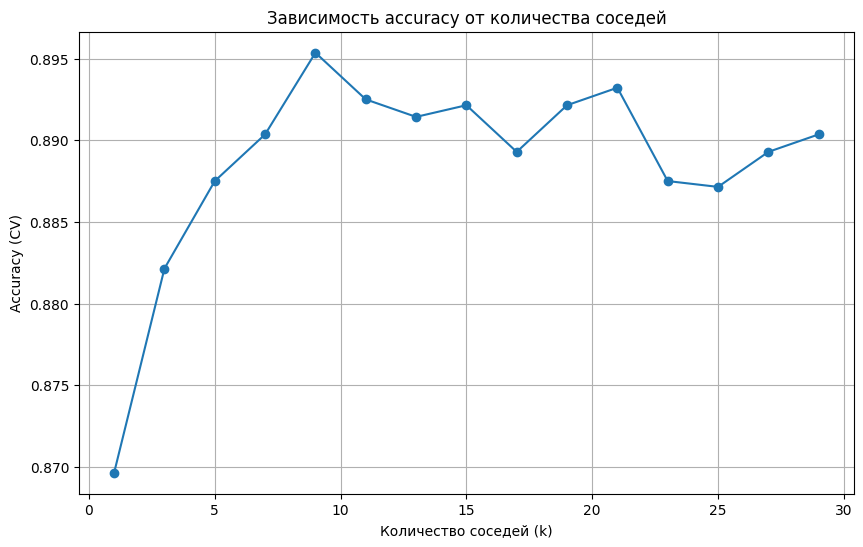

Лучшее значение k: 9


In [177]:
#Подбор оптимального k
k_values = list(range(1, 31, 2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy (CV)')
plt.title('Зависимость accuracy от количества соседей')
plt.grid(True)
plt.show()

# Лучшее значение k
best_k = k_values[np.argmax(cv_scores)]
print(f"Лучшее значение k: {best_k}")

In [178]:
#Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
#Подбор метрики расстояния
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy на кросс-валидации: {grid_search.best_score_:.4f}")

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Лучшая accuracy на кросс-валидации: 0.8989


In [180]:
#Сравнение всех моделей
results_df = pd.DataFrame({
    'Model': ['Baseline', 'Improved Model'],
    'Accuracy': [
        baseline_results['accuracy'],
        improved_results['accuracy']
    ],
    'Precision': [
        baseline_results['precision'],
        improved_results['precision']
    ],
    'Recall': [
        baseline_results['recall'],
        improved_results['recall']
    ],
    'F1-score': [
        baseline_results['f1'],
        improved_results['f1']
    ]
})

print(results_df.to_string(index=False))

         Model  Accuracy  Precision   Recall  F1-score
      Baseline  0.894167   0.894296 0.894167  0.894156
Improved Model  0.885000   0.885511 0.885000  0.884958


In [181]:
#Анализ улучшений
baseline_acc = baseline_results['accuracy']
improved_acc = improved_results['accuracy']
improvement = ((improved_acc - baseline_acc) / baseline_acc) * 100

print(f"Бейзлайн accuracy: {baseline_acc:.4f}")
print(f"Улучшенная модель accuracy: {improved_acc:.4f}")
print(f"Улучшение: {improvement:.2f}%")

Бейзлайн accuracy: 0.8942
Улучшенная модель accuracy: 0.8850
Улучшение: -1.03%


Улучшение модели не было достигнуто. Исходные данные уже хорошо сбалансированы, параметры были близки к оптимальным.

### 4.	Имплементация алгоритма машинного обучения

In [182]:
class CustomKNN:
    def __init__(self, n_neighbors=5, metric='euclidean', weights='uniform'):
        """
        Параметры:
        n_neighbors (int): количество соседей
        metric (str): метрика расстояния ('euclidean', 'manhattan', 'chebyshev')
        weights (str): тип весов ('uniform', 'distance')
        """
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.weights = weights
        self.X_train = None
        self.y_train = None

    #Вычисление расстояния между двумя точками
    def _calculate_distance(self, x1, x2):

        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            #По умолчанию евклидово
            return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        #Преобразуем y в numpy array и сбрасываем индексы
        self.X_train = X
        self.y_train = np.array(y).flatten() if len(y.shape) > 1 else np.array(y)
        return self

    def predict(self, X):
        predictions = []

        for x in X:
            #Вычисляем расстояния до всех тренировочных точек
            distances = []
            for i, train_point in enumerate(self.X_train):
                dist = self._calculate_distance(x, train_point)
                distances.append((dist, i))

            #Сортируем по расстоянию и берем k ближайших
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.n_neighbors]

            #Получаем индексы и метки ближайших соседей
            k_indices = [idx for _, idx in k_nearest]
            k_labels = self.y_train[k_indices]

            #Учитываем веса
            if self.weights == 'uniform':
                #Простое большинство
                unique, counts = np.unique(k_labels, return_counts=True)
                prediction = unique[np.argmax(counts)]
            elif self.weights == 'distance':
                #Обратно пропорционально расстоянию
                weights = 1.0 / (np.array([dist for dist, _ in k_nearest]) + 1e-10)
                weighted_votes = {}

                for idx, label in enumerate(k_labels):
                    if label not in weighted_votes:
                        weighted_votes[label] = 0
                    weighted_votes[label] += weights[idx]

                prediction = max(weighted_votes, key=weighted_votes.get)
            else:
                #По умолчанию uniform
                unique, counts = np.unique(k_labels, return_counts=True)
                prediction = unique[np.argmax(counts)]

            predictions.append(prediction)

        return np.array(predictions)


In [183]:
#Удаление индексов
X_train_custom = X_train_scaled
y_train_custom = pd.Series(y_train.values)
X_test_custom = X_test_scaled
y_test_custom = pd.Series(y_test.values)

In [184]:
#Инициализация модели c baseline
custom_knn = CustomKNN(
    n_neighbors=best_params['n_neighbors'],
    metric=best_params['metric'] if best_params['metric'] in ['euclidean', 'manhattan', 'chebyshev'] else 'euclidean',
    weights=best_params['weights']
)

# Обучаем на подготовленных данных
custom_knn.fit(X_train_custom, y_train_custom)

# Предсказываем
y_pred_custom = custom_knn.predict(X_test_scaled)


Custom KNN Результаты:
Accuracy: 0.8892
Precision: 0.8895
Recall: 0.8892
F1-score: 0.8891


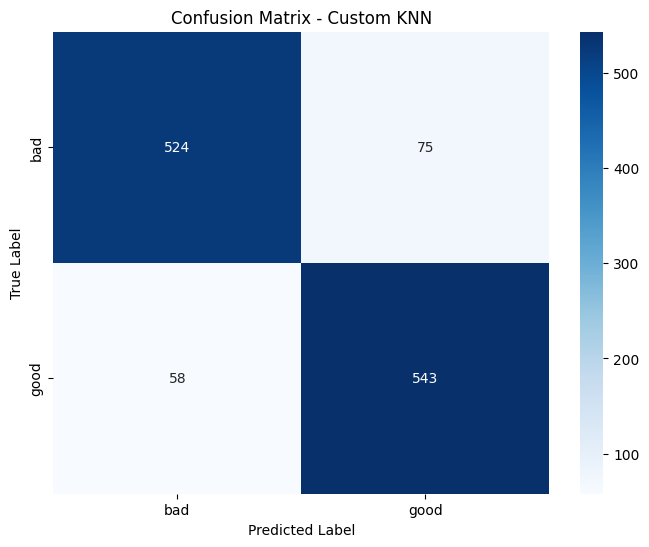

In [185]:
#Оценка
custom_results = evaluate_model(y_test, y_pred_custom, "Custom KNN")

In [186]:
#Сравнение всех моделей
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline KNN': [
        baseline_results['accuracy'],
        baseline_results['precision'],
        baseline_results['recall'],
        baseline_results['f1']
    ],
    'Improved KNN': [
        improved_results['accuracy'],
        improved_results['precision'],
        improved_results['recall'],
        improved_results['f1']
    ],
    'Custom KNN': [
        custom_results['accuracy'],
        custom_results['precision'],
        custom_results['recall'],
        custom_results['f1']
    ]
})

print("Сравнение всех моделей:")
print(comparison_df.to_string(index=False))


Сравнение всех моделей:
   Metric  Baseline KNN  Improved KNN  Custom KNN
 Accuracy      0.894167      0.885000    0.889167
Precision      0.894296      0.885511    0.889474
   Recall      0.894167      0.885000    0.889167
 F1-score      0.894156      0.884958    0.889142


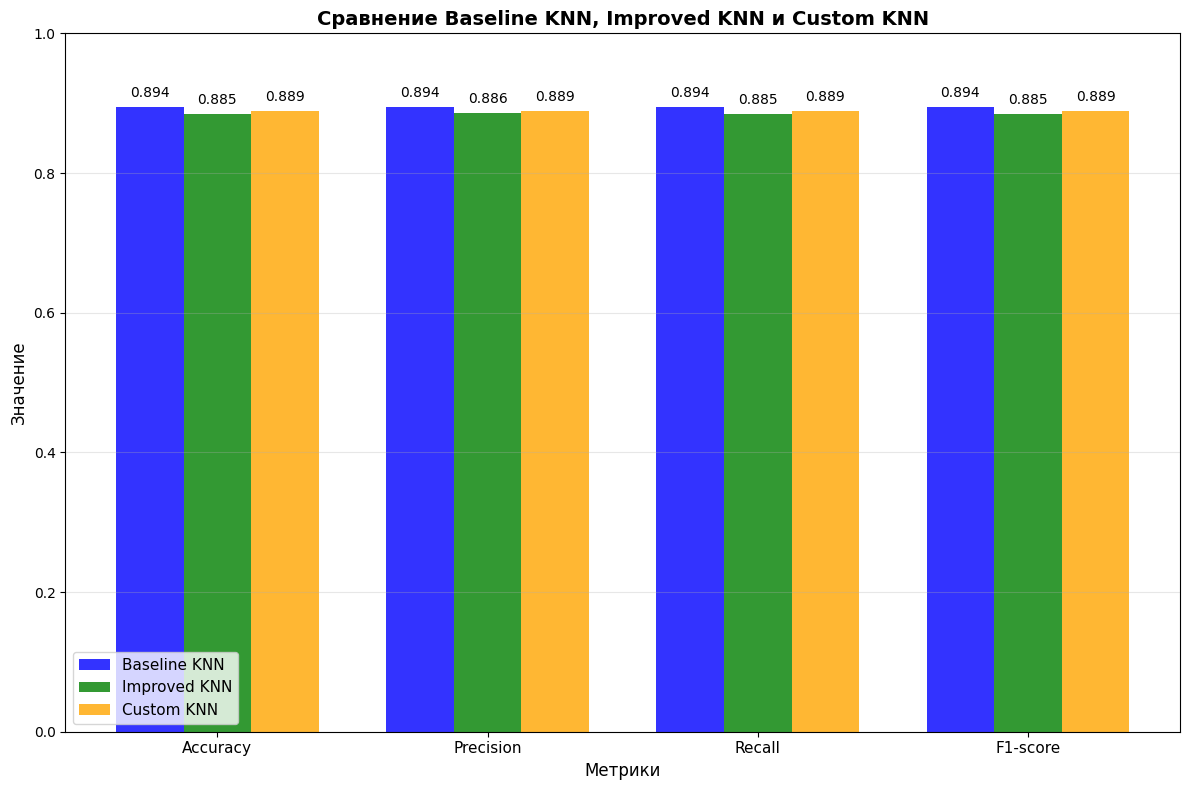

In [187]:
#Визуализация сравнения
plt.figure(figsize=(12, 8))
x = np.arange(len(comparison_df))
width = 0.25

plt.bar(x - width, comparison_df['Baseline KNN'], width, label='Baseline KNN', alpha=0.8, color='blue')
plt.bar(x, comparison_df['Improved KNN'], width, label='Improved KNN', alpha=0.8, color='green')
plt.bar(x + width, comparison_df['Custom KNN'], width, label='Custom KNN', alpha=0.8, color='orange')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение Baseline KNN, Improved KNN и Custom KNN', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_df['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i in range(len(comparison_df)):
    plt.text(i - width, comparison_df['Baseline KNN'][i] + 0.01,
             f'{comparison_df["Baseline KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)
    plt.text(i, comparison_df['Improved KNN'][i] + 0.01,
             f'{comparison_df["Improved KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)
    plt.text(i + width, comparison_df['Custom KNN'][i] + 0.01,
             f'{comparison_df["Custom KNN"][i]:.3f}',
             ha='center', va='bottom', fontsize=10)

max_val = max(comparison_df[['Baseline KNN', 'Improved KNN', 'Custom KNN']].max().max() + 0.1, 1.0)
plt.ylim(0, max_val)
plt.tight_layout()
plt.show()

Все три модели показали близкие результаты по всем метрикам, причем Baseline KNN демонстрирует наилучшую точность (89.42%), однако все модели находятся в диапазоне 88-90%, что свидетельствует о хорошей стабильности классификации качества яблок вне зависимости от выбранного подхода.

## Задача регрессии